In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$\Large\textbf{Lab 1. Exercise 2. }$

Now we will consider a slightly different algorithm which can be used to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

#1.$\textbf{[R]}$ Write the function $f(\mathbf{x})$ in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 



#Solution:

$\begin{bmatrix}
X_1 & X_2 \\
\end{bmatrix}$*$\begin{bmatrix}
1 & 0\\0 & 1
\end{bmatrix}$*$\begin{bmatrix}
X_1  \\ X2
\end{bmatrix}$+2*$\begin{bmatrix}
100 & -25 \\
\end{bmatrix}$*$\begin{bmatrix}
X_1 \\X2
\end{bmatrix}$+10625


#2.$\textbf{[R]}$ It turns out that for a function $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$ of the form $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$, the analytical solution to $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ can be found in closed form. Find the solution. 

#Solution:

Given that $f:{\mathbb{R}}^n\rightarrow \mathbb{R}$

$f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$

where $\mathbf{A}\in{\mathbb{R}}^{n \times n}$ is a symmetric matrix, $\mathbf{b} \in {\mathbb{R}}^n$ and $c\in \mathbb{R}$

Aim:  $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x})) , \alpha \ge 0$
 
 let ,

 $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$=$g(\mathbf{\alpha})$

 necessary condition of the optimility is 

 $g'(\mathbf{\alpha})=0$


  =$\frac{df(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}{df(\mathbf{x} - \alpha \nabla f(\mathbf{x})}*\frac{df(\mathbf{x} - \alpha \nabla f(\mathbf{x}))}{d\alpha}$=0

  =($\nabla f(x-\alpha \nabla  f(\mathbf{x})^\top$*$\nabla f(x)$=0


=($\nabla f(x)^\top$)*($\nabla f(x-\alpha \nabla  f(\mathbf{x})$=0


=($\nabla f(x)^\top$)*$[2*A(x-\alpha \nabla f(x))$+2b]=0

=($\nabla f(x)^\top)*(A *x-\alpha*(\nabla f(x)^\top*A*(\nabla (f(x)+(\nabla f(x)^\top*b$)=0

=$\alpha=\frac{(\nabla f(x)^\top)*A*x + (\nabla f(x)^\top)*b}{\nabla f(x)^\top*A*\nabla f(x)^\top}
$

=$\alpha = \frac{(\nabla f(x)^\top)*(A*x+b}{(\nabla f(x)^\top)*A*(\nabla f(x))}$


=$\alpha=\frac{(\nabla f(x)^\top)*(\nabla f(x))}{2*(\nabla f(x)^\top))*A*(\nabla f(x)}$


where $\nabla f(x)=2*A*x+2*b$

for the minimum of $\alpha$

$\nabla^{2} f(x)\ge 0$

and $\nabla^{2} f(x)=2*A$ 

and $2*A \ge 0$
which implies that $\nabla^{2} f(x)$ positive definite

so $\alpha$ is minimum







We will use this idea to construct a suitable step length finding procedure for our modified algorithm given below: 


\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

In [20]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [21]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [22]:
#Complete the module to compute the steplength
def compute_steplength(x): #add appropriate arguments to the function 
  #Complete the code
  A=np.array([[1,0],[0,1]]) 
  num=np.dot(evalg(x),evalg(x))
  den=np.matmul(np.matmul(evalg(x),A),evalg(x))
  step_length=num/(2*den)
  return step_length

In [23]:
def find_minimizer(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x 


In [24]:
def find_iterator(start_x, tol):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength(x) #call the new function you wrote to compute the steplength
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return k 

#4.[R] With starting point x0 = (10, 10) and the new module to compute ηk, try τ = 10−p where p = 1, 2, . . . , 10.For each τ , record the number of iterations taken by the algorithm to terminate. Prepare a plot where the number of iterations is plotted against τ values. Compare and contrast the plot with the plots obtained in Exercise 1 with fixed step length values.

#Solution:here when τ values increses the number of iteration is constant but in excerise 1 tolerance value increses the corresponding number of iterations are decreses

In [33]:
number_of_iterations=[]

p=[1,2,3,4,5,6,7,8,9,10]
My_tol=[]
my_start_x = np.array([10,10])
for i in p:
  my_tol= 10**(-i)
  My_tol.append(my_tol)
  number_of_iterations.append(find_iterator(my_start_x, my_tol))
print(My_tol)  

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]


In [26]:
print(number_of_iterations)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Text(0, 0.5, 'number_of_iterations')

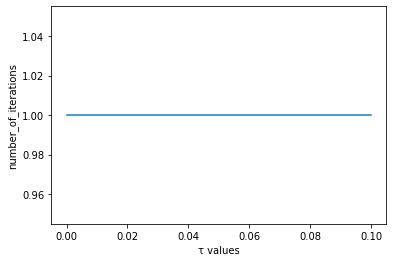

In [35]:
plt.plot(My_tol,number_of_iterations)
plt.xlabel('τ values')
plt.ylabel('number_of_iterations')